In [2]:
import pandas as pd 
import numpy as np 

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
import pandas_profiling 
import wordcloud

In [5]:
pd.set_option('display.max_columns',None) """ this untruncates columns"""
pd.set_option('display.max_rows',None)    """ this untruncates columns"""

In [6]:
df_cr=pd.read_csv(r'C:\Users\m_joekid\Desktop\Movie Success\tmdb_5000_credits.csv')
df_mv=pd.read_csv(r'C:\Users\m_joekid\Desktop\Movie Success\tmdb_5000_movies.csv')

In [7]:
df_cr.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [8]:
df_mv.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [9]:
df_mv.rename(columns={'id':'movie_id'},inplace=True) """ renamed columns for merge key"""

In [10]:
df=df_cr.merge(df_mv,on='movie_id')

In [11]:
df.shape

(4803, 23)

In [12]:
df.sample(2)

movie_id           title_x  \
695        710         GoldenEye   
3644      8744  Albino Alligator   

                                                   cast  \
695   [{"cast_id": 1, "character": "James Bond", "cr...   
3644  [{"cast_id": 3, "character": "Dova", "credit_i...   

                                                   crew    budget  \
695   [{"credit_id": "52fe426ec3a36847f801e16f", "de...  58000000   
3644  [{"credit_id": "52fe44b7c3a36847f80a5f55", "de...   6000000   

                                                 genres  \
695   [{"id": 12, "name": "Adventure"}, {"id": 28, "...   
3644  [{"id": 80, "name": "Crime"}, {"id": 18, "name...   

                                          homepage  \
695   http://www.mgm.com/view/movie/757/Goldeneye/   
3644                                           NaN   

                                               keywords original_language  \
695   [{"id": 701, "name": "cuba"}, {"id": 769, "nam...                en   
3644  [{"id": 380, "name": "brother brother relation...                en   

        original_title                                           overview  \
695          GoldenEye  James Bond must unmask the mysterious head of ...   
3644  Albino Alligator  Three petty thieves who the police believe to ...   

      popularity                               production_companies  \
695    59.824565  [{"name": "United Artists", "id": 60}, {"name"...   
3644    2.388683  [{"name": "Miramax Films", "id": 14}, {"name":...   

                                   production_countries release_date  \
695   [{"iso_3166_1": "GB", "name": "United Kingdom"...   1995-11-16   
3644  [{"iso_3166_1": "US", "name": "United States o...   1996-09-09   

        revenue  runtime                                   spoken_languages  \
695   352194034    130.0  [{"iso_639_1": "en", "name": "English"}, {"iso...   
3644          0     97.0           [{"iso_639_1": "en", "name": "English"}]   

        status                                            tagline  \
695   Released               No limits. No fears. No substitutes.   
3644  Released  They Planned The Perfect Crime... Until It All...   

               title_y  vote_average  vote_count  
695          GoldenEye           6.6        1174  
3644  Albino Alligator           5.6          45

In [13]:
#  dropped columns i thought were redundant 
drop1=['movie_id','title_x','homepage','overview','tagline','title_y','spoken_languages']
df_copy=df.copy()

In [14]:
df_copy.drop(drop1,axis=1,inplace=True)

In [15]:
df_copy.sample(3)

cast  \
1870  [{"cast_id": 1, "character": "Viola", "credit_...   
1397  [{"cast_id": 14, "character": "Professor G.H. ...   
4600  [{"cast_id": 1001, "character": "Herself", "cr...   

                                                   crew    budget  \
1870  [{"credit_id": "52fe4517c3a36847f80bbe7f", "de...  20000000   
1397  [{"credit_id": "52fe440bc3a36847f807ef5b", "de...         0   
4600  [{"credit_id": "52fe49c4c3a368484e13e9bb", "de...         0   

                                                 genres  \
1870  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...   
1397  [{"id": 35, "name": "Comedy"}, {"id": 80, "nam...   
4600                [{"id": 99, "name": "Documentary"}]   

                                               keywords original_language  \
1870  [{"id": 1253, "name": "roommate"}, {"id": 1608...                en   
1397  [{"id": 2409, "name": "church choir"}, {"id": ...                en   
4600                                                 []                en   

       original_title  popularity  \
1870    She's the Man   10.814390   
1397  The Ladykillers   23.666229   
4600  51 Birch Street    0.049921   

                                   production_companies  \
1870  [{"name": "DreamWorks SKG", "id": 27}, {"name"...   
1397  [{"name": "Mike Zoss Productions", "id": 2092}...   
4600       [{"name": "Copacetic Pictures", "id": 8139}]   

                                   production_countries release_date  \
1870  [{"iso_3166_1": "US", "name": "United States o...   2006-03-17   
1397  [{"iso_3166_1": "US", "name": "United States o...   2004-03-25   
4600                                                 []   2006-10-18   

       revenue  runtime    status  vote_average  vote_count  
1870  33889159    105.0  Released           6.4         671  
1397         0    104.0  Released           6.0         415  
4600         0     90.0  Released           6.8           6

In [16]:
# pandas_profiling.ProfileReport(df_copy)

##  Data Assesment Issues From Profile Report
    * JSON ENTRIES 
    * Budget has 21.6% zeros 
    * release_date has missing values
    * runtime has missing values 
    * revenue has 29.7% zeros !
    * vote average has 1.3% zeros 
    * vote count has 1.3% zeros 

## Dealing with the JSON entries

In [17]:
import ast

In [19]:
dict_cols=['cast','crew','genres','keywords','production_countries','production_companies']

for col in dict_cols:
    df_copy[col] = df_copy[col].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))
    # literal_eval evaluates strings as python expressions (read doc)||pythons eval could be used too. 

In [20]:
def get_names(x, col):
    """
        Get the name field from each JSON object.
        For crew field, the Director is the most important role
        For cast field, only the first 3 cast(leading roles)
    """
    names = []
    for item in x:
        if col=='crew':
            if item['job']=='Director': 
                names.append(item['name'])
        elif col=='cast':
            if item['order'] in (0, 1, 2):
                names.append(item['name'])
        else:
            names.append(item['name'])
    return names
    
for col in dict_cols:
    df_copy[col] = df_copy[col].apply(lambda x: get_names(x, col))

In [36]:
df_copy.sample(1)

cast  \
3563  [Katie Featherston, Kathryn Newton, Matt Shively]   

                               crew   budget    genres  \
3563  [Henry Joost, Ariel Schulman]  5000000  [Horror]   

                                               keywords original_language  \
3563  [garage, poltergeist, webcam, imaginary friend...                en   

             original_title  popularity  \
3563  Paranormal Activity 4   20.326337   

                                   production_companies  \
3563  [Paramount Pictures, Blumhouse Productions, Ro...   

            production_countries release_date    revenue  runtime    status  \
3563  [United States of America]   2012-10-17  142817992     95.0  Released   

      vote_average  vote_count  release_year  release_month  release_quarter  
3563           5.2         563          2012             10                4

In [50]:
df_copy['original_language'].unique()

array(['en', 'ja', 'fr', 'zh', 'ko', 'te', 'ru', 'de', 'cn', 'es', 'it',
       'nl', 'th', 'da', 'xx', 'hi', 'is', 'nb', 'pt', 'af', 'pl', 'he',
       'vi', 'id', 'ro', 'no', 'fa'], dtype=object)

## Dealing with zero values and missing runtime data

In [26]:
df_copy=df_copy[df_copy['revenue']!=0]

In [29]:
df_copy=df_copy[df_copy['budget']!=0]

In [31]:
df_copy['runtime']=df_copy['runtime'].fillna(df_copy['runtime'].mean()) 

## Dealing with datetime values

In [33]:
df_copy['release_date']=pd.to_datetime(df_copy['release_date'])

In [35]:
df_copy['release_year']=df_copy['release_date'].dt.year
df_copy['release_month']=df_copy['release_date'].dt.month
df_copy['release_quarter']=df_copy['release_date'].dt.quarter

In [37]:
del(df_copy['release_date'])

## VISUALS

In [41]:
from wordcloud import WordCloud

(-0.5, 1199.5, 999.5, -0.5)

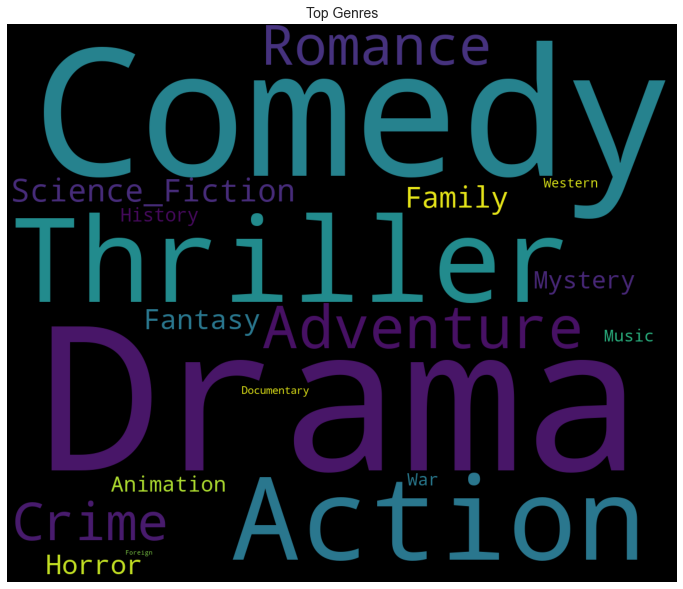

In [44]:
genres = list(df_copy['genres'].values)
plt.figure(figsize = (12, 12))
text = ' '.join(['_'.join(i.split(' ')) for j in genres for i in j])
wordcloud = WordCloud(max_font_size=None, background_color='black', collocations=False, width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top Genres', fontsize=14)
plt.axis("off")

(0.0, 14.0)

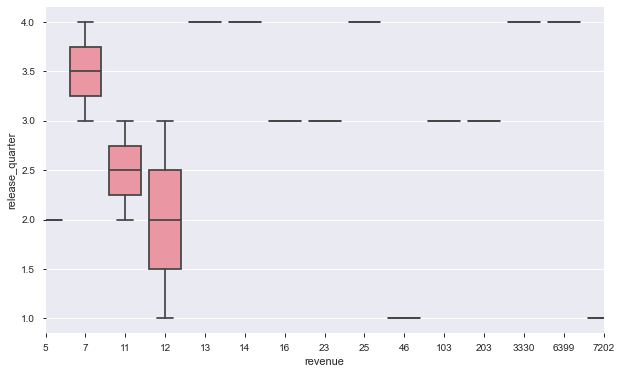

In [53]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='revenue', y='release_quarter', data=df_copy)
ax.set_title('Revenue Vs. quarter of release')
plt.xlim(0, 14)

Text(0.5, 1.0, 'Budget Vs. Revenue')

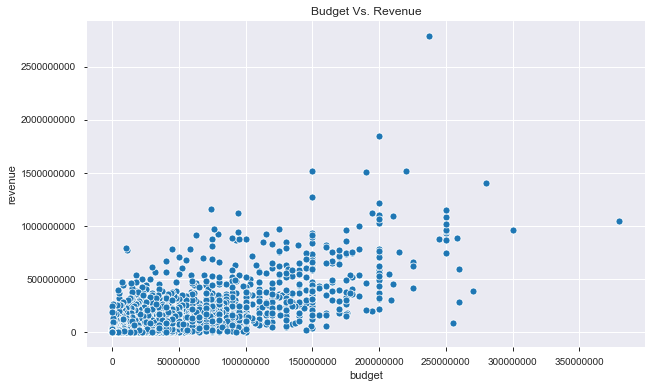

In [54]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', data=df_copy)
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set_title('Budget Vs. Revenue')

Text(0.5, 1.0, 'Avg. Revenue per quarter')

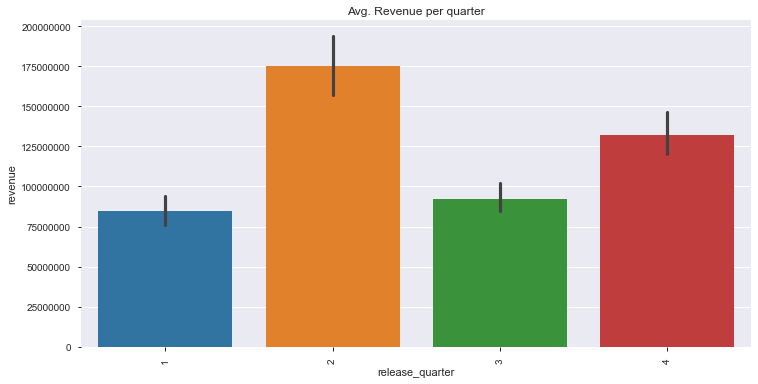

In [55]:
plt.figure(figsize=(12, 6))
sns.barplot(x='release_quarter', y='revenue', data=df_copy, estimator=np.mean)
plt.xticks(rotation=90)
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set_title('Avg. Revenue per quarter')

Text(0.5, 1.0, 'Revenue Vs. quarter of release')

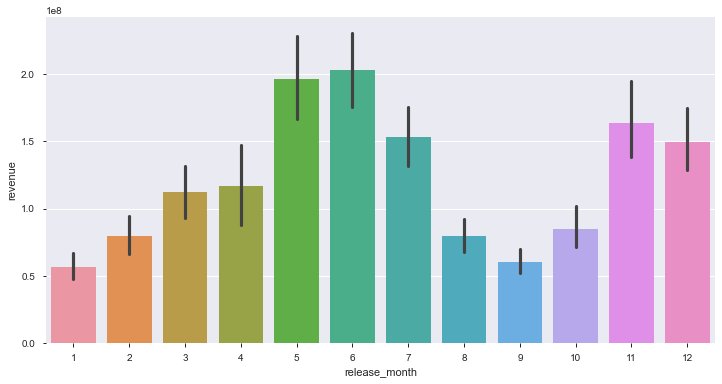

In [59]:
plt.figure(figsize=(12, 6))
sns.barplot(y='revenue', x='release_month', data=df_copy)
ax.set_title('Revenue Vs. quarter of release')